### Bước 1: Import thư viện

In [16]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk


### Bước 2: Nhập dữ liệu

In [17]:
def ImportData (TenData):
    fsentiment= open("Data/"+ TenData+"/sentiments.txt","r", encoding = "utf-8").read().splitlines()
    fsents= open("Data/"+ TenData+"/sents.txt","r", encoding = "utf-8").read().splitlines()
    ftopics= open("Data/"+ TenData+"/topics.txt","r", encoding = "utf-8").read().splitlines()
    TenFile= TenData+"_df"
    TenFile = pd.DataFrame({"topics":ftopics,"sentences": fsents,"sentiments": fsentiment})
    return TenFile
train_df = ImportData("train")
test_df = ImportData("test")
val_df = ImportData("dev")
#       '0' is negative polarity.
#		'1' is neutral polarity.
#		'2' is positive polarity.

#       '0' is a label related to the lecturer topic.
#       '1' is a label related to the training program topic.
#       '2' is a label related to the facility topic.
#       '3' is a label related to others.

### Bước 3: Kiểm tra dữ liệu

In [18]:
print("Kiểm tra dữ liệu có bị thiếu:\n")
print("File test:\n", test_df.isna().sum())
print("File train:\n", train_df.isna().sum())
print("File valid:\n", val_df.isna().sum())

print("\nKiểm tra kiểu dữ liệu: \n",train_df.dtypes)

print("\nKiểm tra sự trùng lặp giữa tập train, test, valid\n")
check = pd.concat([test_df, train_df, val_df], axis=0)
print(check.duplicated().sum())

Kiểm tra dữ liệu có bị thiếu:

File test:
 topics        0
sentences     0
sentiments    0
dtype: int64
File train:
 topics        0
sentences     0
sentiments    0
dtype: int64
File valid:
 topics        0
sentences     0
sentiments    0
dtype: int64

Kiểm tra kiểu dữ liệu: 
 topics        object
sentences     object
sentiments    object
dtype: object

Kiểm tra sự trùng lặp giữa tập train, test, valid

0


In [19]:
print(train_df.head(5))

  topics                                          sentences sentiments
0      1                          slide giáo trình đầy đủ .          2
1      0     nhiệt tình giảng dạy , gần gũi với sinh viên .          2
2      1               đi học đầy đủ full điểm chuyên cần .          0
3      0  chưa áp dụng công nghệ thông tin và các thiết ...          0
4      0  thầy giảng bài hay , có nhiều bài tập ví dụ ng...          2


In [20]:
emotion_words = ['colonsmile', 'colonsad', 'colonsurprise', 'colonlove', 'colonsmilesmile', 
                 'coloncontemn', 'colonbigsmile', 'coloncc', 'colonsmallsmile', 'coloncolon',
                 'colonlovelove', 'colonhihi', 'colonsadcolon', 'colondoublesurprise', 
                 'vdotv', 'dotdotdot', 'fraction', 'cshrap']

# Đếm số lần các từ này xuất hiện trong cột 'sentences' của DataFrame train_df
for word in emotion_words:
    count = train_df['sentences'].str.contains(word).sum()
    print(f"Số lần '{word}' xuất hiện: {count}")

Số lần 'colonsmile' xuất hiện: 39
Số lần 'colonsad' xuất hiện: 13
Số lần 'colonsurprise' xuất hiện: 1
Số lần 'colonlove' xuất hiện: 7
Số lần 'colonsmilesmile' xuất hiện: 12
Số lần 'coloncontemn' xuất hiện: 9
Số lần 'colonbigsmile' xuất hiện: 5
Số lần 'coloncc' xuất hiện: 0
Số lần 'colonsmallsmile' xuất hiện: 4
Số lần 'coloncolon' xuất hiện: 1
Số lần 'colonlovelove' xuất hiện: 0
Số lần 'colonhihi' xuất hiện: 3
Số lần 'colonsadcolon' xuất hiện: 2
Số lần 'colondoublesurprise' xuất hiện: 3
Số lần 'vdotv' xuất hiện: 8
Số lần 'dotdotdot' xuất hiện: 5
Số lần 'fraction' xuất hiện: 18
Số lần 'cshrap' xuất hiện: 0


### Bước 3: Tiền xử lý dữ liệu

In [21]:
stop_words = []
with open("Data/vnesestopwords.txt", encoding="utf-8") as f :
    text = f.read()
    for word in text.split('\n'):
        stop_words.append(word)
    f.close()

def TienXuLy(text, stop_words):
    text = text.strip().lower()
    # Loại bỏ dấu câu và ký tự đặc biệt
    text = re.sub(r'[^a-zA-Z0-9àáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ\s]', '', text)
    
    
    # Loại bỏ từ dừng
    #text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text



In [22]:
# Áp dụng hàm tiền xử lý lên các tập dữ liệu
train_df['sentences'] = train_df['sentences'].apply(lambda x: TienXuLy(x, stop_words))
test_df['sentences'] = test_df['sentences'].apply(lambda x: TienXuLy(x, stop_words))
val_df['sentences'] = val_df['sentences'].apply(lambda x: TienXuLy(x, stop_words))

# Chuyển đổi cột sentiments từ object sang số
train_df["sentiments"] = train_df["sentiments"].astype(int)
test_df["sentiments"] = test_df["sentiments"].astype(int)
val_df["sentiments"] = val_df["sentiments"].astype(int)

In [23]:
print ("\n Thông tin file train:\n")
print (train_df.info())
print ("\n Thông tin file test:\n")
print (test_df.info())
print ("\n Thông tin file valid:\n")
print (val_df.info())


 Thông tin file train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11426 entries, 0 to 11425
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topics      11426 non-null  object
 1   sentences   11426 non-null  object
 2   sentiments  11426 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 223.3+ KB
None

 Thông tin file test:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3166 entries, 0 to 3165
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topics      3166 non-null   object
 1   sentences   3166 non-null   object
 2   sentiments  3166 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 62.0+ KB
None

 Thông tin file valid:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topics  

Kết hợp dữ liệu train và valid để huấn luyện

In [24]:
train_df = pd.concat([train_df, val_df], axis=0, ignore_index=True)
print (train_df.info())

# Kiểm tra dữ liệu trùng lặp và loại bỏ
print(f"Số lượng dòng trùng lặp sau khi gộp: ",train_df.duplicated().sum())

# Loại bỏ trùng lặp
train_df = train_df.drop_duplicates()
print("Kích thước tập train sau khi loại bỏ trùng lặp:", train_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13009 entries, 0 to 13008
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topics      13009 non-null  object
 1   sentences   13009 non-null  object
 2   sentiments  13009 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 254.2+ KB
None
Số lượng dòng trùng lặp sau khi gộp:  56
Kích thước tập train sau khi loại bỏ trùng lặp: (12953, 3)


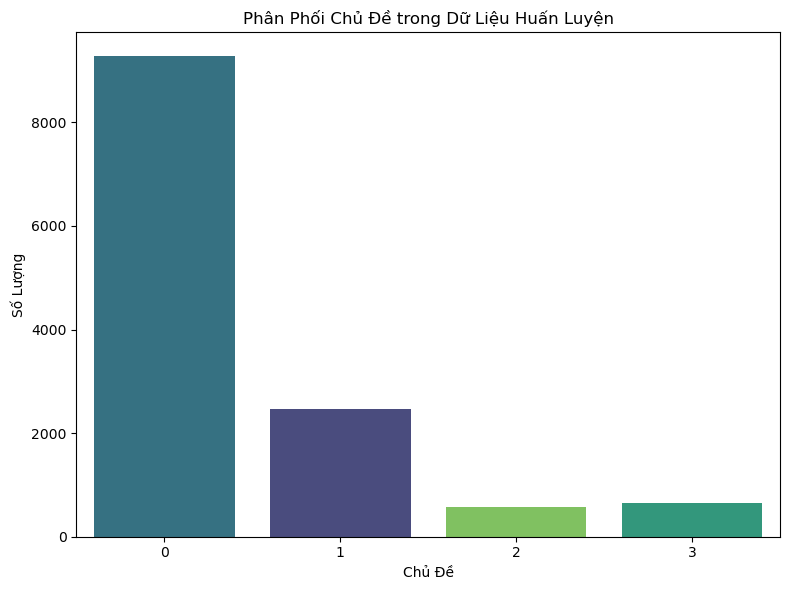

In [25]:
# Biểu đồ đếm chủ đề cho dữ liệu train
plt.figure(figsize=(8, 6))
sns.countplot(x="topics", data=train_df, hue="topics", palette="viridis", order=[0, 1, 2, 3], legend=False)

plt.title("Phân Phối Chủ Đề trong Dữ Liệu Huấn Luyện")
plt.xlabel("Chủ Đề")
plt.ylabel("Số Lượng")
plt.tight_layout()
plt.show()

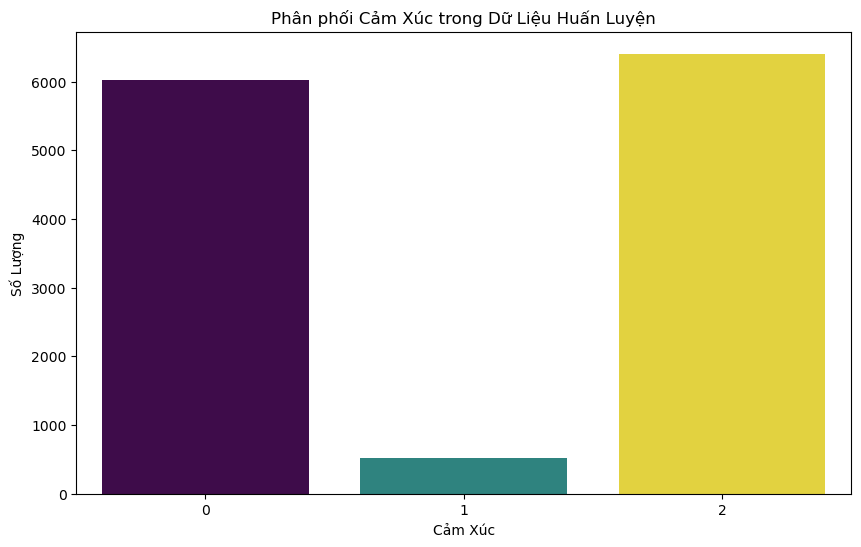

In [26]:
# Biểu đồ đếm sentiment cho dữ liệu train
plt.figure(figsize=(10, 6))
sns.countplot(x="sentiments", data=train_df, hue="sentiments", palette="viridis", order=sorted(train_df["sentiments"].unique()), legend=False)

plt.title("Phân phối Cảm Xúc trong Dữ Liệu Huấn Luyện")
plt.xlabel("Cảm Xúc")
plt.ylabel("Số Lượng")
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV  # Để tìm tham số tối ưu

# Sử dụng trực tiếp dữ liệu từ train_df và test_df
X_train = train_df['sentences']  # Cột chứa văn bản trong tập huấn luyện
y_train = train_df['sentiments']  # Cột chứa nhãn cảm xúc trong tập huấn luyện

X_test = test_df['sentences']  # Cột chứa văn bản trong tập kiểm tra
y_test = test_df['sentiments']  # Cột chứa nhãn cảm xúc trong tập kiểm tra

# Vector hóa văn bản bằng TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Chỉ lấy 5000 từ phổ biến nhất
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Xây dựng mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test_tfidf)

# Đánh giá mô hình
print("Mô hình Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Mô hình Logistic Regression:
Accuracy: 0.8828174352495262

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1409
           1       0.64      0.10      0.17       167
           2       0.91      0.91      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.80      0.65      0.66      3166
weighted avg       0.87      0.88      0.87      3166



In [28]:
from sklearn.ensemble import RandomForestClassifier

# Tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình Random Forest
rf_model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test_tfidf)

# Đánh giá mô hình Random Forest
print("Mô hình Random Forest:")
print("Độ chính xác:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Mô hình Random Forest:
Độ chính xác: 0.8768161718256475

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1409
           1       0.75      0.14      0.24       167
           2       0.92      0.89      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.84      0.66      0.68      3166
weighted avg       0.87      0.88      0.86      3166



In [29]:
from sklearn.svm import SVC

# Tạo mô hình SVM
svm_model = SVC(kernel='linear')

# Huấn luyện mô hình SVM
svm_model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_tfidf)

# Đánh giá mô hình SVM
print("Mô hình SVM:")
print("Độ chính xác:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Mô hình SVM:
Độ chính xác: 0.890397978521794

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1409
           1       0.80      0.10      0.17       167
           2       0.92      0.91      0.92      1590

    accuracy                           0.89      3166
   macro avg       0.86      0.66      0.67      3166
weighted avg       0.89      0.89      0.87      3166



In [30]:
# Bước 5: Hàm dự đoán cảm xúc cho một câu mới
def predict_sentiment(input_text):
    
    input_text= TienXuLy(input_text,stop_words)
    
    # Vector hóa câu nhập vào
    input_tfidf = vectorizer.transform([input_text])
    
    # Dự đoán với mô hình đã huấn luyện
    prediction = model.predict(input_tfidf)
    
    # Chuyển kết quả thành nhãn cảm xúc tương ứng
    if prediction == 0:
        return "Tiêu cực"
    elif prediction == 1:
        return "Trung lập"
    else:
        return "Tích cực"

# Nhập câu từ người dùng và dự đoán
input_text = input("Nhập câu bạn muốn phân tích cảm xúc: ")
result = predict_sentiment(input_text)
print("Mô hình sử dụng: ",model)
print(f"Cảm xúc của câu bạn nhập là: {result}")

Nhập câu bạn muốn phân tích cảm xúc:  hay


Mô hình sử dụng:  LogisticRegression()
Cảm xúc của câu bạn nhập là: Tích cực
